# Project 1
## Jonathan Dyer — jbdyer
## Shikha Goel — shikhag

# Problem domain and motivation
Selecting an undergraduate or graduate school can be overwhelming! 
Even more daunting is the cost and financial burden of obtaining this education. 
All of us have wondered at some point if choosing an expensive university like Carnegie Mellon will get us a job that makes the cost worth it.

Our question to answer then, is:  
1. Is college worth it?
2. More specifically, _is CMU worth it_ for you (our classmates/audience)?

In other words, **will we get a return on our investment?**

# Dataset and EDA
Our data is provided publicly by the U.S. Department of Education at https://collegescorecard.ed.gov/data/. From their website:
> The College Scorecard is designed to increase transparency, putting the power in the hands of the public — from those choosing colleges to those improving college quality — to see how well different schools are serving their students.

This set contains over 20 years of data from thousands of universities and includes detailed information such as number of students, demographic information, admission rates, completion rates, cost of tuition, and earnings data among many others.

**NOTE**: Importantly, this data is restricted to Title-IV eligible institutions, which means those institutions whose students may receive federal loans and grants. This still includes a vast number of institutions, but it is important to recognize this caveat.

---
Let's start by taking a peek at the most recent year's data, to help us get an idea of the right kind of questions to ask.
More detailed information about the information collected can be found at https://collegescorecard.ed.gov/assets/FullDataDocumentation.pdf.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('data/Most-Recent-Cohorts-All-Data-Elements.csv', na_values='PrivacySuppressed')
data.head()

C:\Users\jondyer\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (31,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,https://galileo.aamu.edu/NetPriceCalculator/np...,...,0.4048,0.2645,0.0137,0.3150,0.3755,0.2958,0.0289,0.4224,0.2635,0.2852
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,0.5448,0.1200,0.0728,0.2583,0.5872,0.0817,0.1398,0.2618,0.3977,0.2008
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,0.4647,0.1912,0.0148,0.3284,0.4391,0.2177,0.0280,0.3645,0.4486,0.1589
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.5121,0.1593,0.0165,0.3230,0.5361,0.1243,0.0245,0.3947,0.3476,0.2331
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.4226,0.0754,0.0254,0.5327,0.3133,0.1286,0.0210,0.5804,0.1678,0.2308


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Columns: 1977 entries, UNITID to OMENRUP_PARTTIME_POOLED_SUPP
dtypes: float64(1944), int64(14), object(19)
memory usage: 107.3+ MB


This is a big dataset! There are nearly 2000 columns with details about over 7000 schools, just for this one year.


Let's try to get a snapshot view of the state of tuition and earnings data for this year.

In [12]:
# let's get tuition, mean/median earnings after 10 years, admittance rates, and debt
sub_data = data[['UNITID',
                 'TUITIONFEE_IN',       # instate tuition
                 'TUITIONFEE_OUT',      # out-of-state tuition
                 'MN_EARN_WNE_P10',     # mean earnings 10 yrs after enrollment
                 'MD_EARN_WNE_P10',     # median earnings 10 yrs after enrollment
                 'ADM_RATE',            # admissions rate
                 'DEBT_MDN',            # median debt
                 'PCTPELL'              # percentage of students with Pell grants
                ]].copy()
sub_data.head()

,UNITID,TUITIONFEE_IN,TUITIONFEE_OUT,MN_EARN_WNE_P10,MD_EARN_WNE_P10,ADM_RATE,DEBT_MDN,PCTPELL
0,100654,9857.0,18236.0,35500.0,31000.0,0.9027,13246.0,0.7100
1,100663,8328.0,19032.0,48400.0,41200.0,0.9181,14979.5,0.3532
2,100690,6900.0,6900.0,47600.0,39600.0,NaN,10430.0,0.7415
3,100706,10280.0,21480.0,52000.0,46700.0,0.8123,13522.0,0.2765
4,100724,11068.0,19396.0,30600.0,27700.0,0.9787,15738.0,0.7377


In [13]:
# convert columns to numeric for plotting
sub_data['MD_EARN_WNE_P10'] = pd.to_numeric(sub_data['MD_EARN_WNE_P10'])
sub_data['MN_EARN_WNE_P10'] = pd.to_numeric(sub_data['MN_EARN_WNE_P10'])
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 8 columns):
UNITID             7112 non-null int64
TUITIONFEE_IN      4021 non-null float64
TUITIONFEE_OUT     3793 non-null float64
MN_EARN_WNE_P10    5175 non-null float64
MD_EARN_WNE_P10    5175 non-null float64
ADM_RATE           2037 non-null float64
DEBT_MDN           5969 non-null float64
PCTPELL            6342 non-null float64
dtypes: float64(7), int64(1)
memory usage: 444.6 KB


<Figure size 432x288 with 0 Axes>

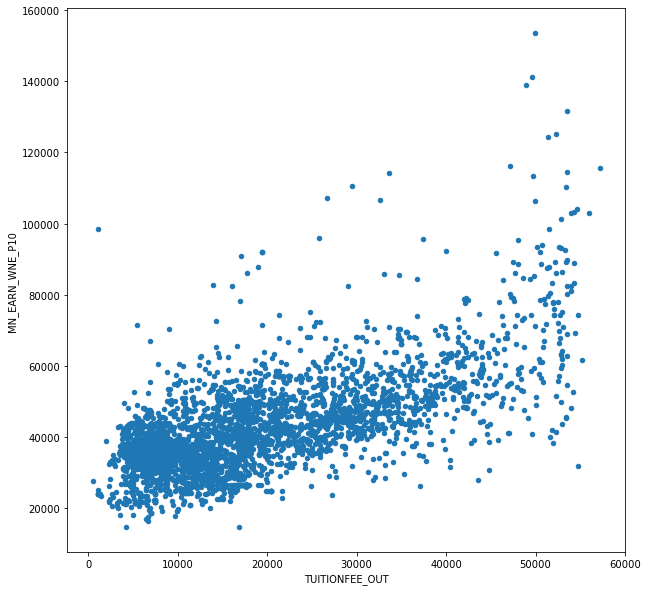

In [14]:
# let's start with out-state tuition for now
plt.figure()
sub_data.plot.scatter(x='TUITIONFEE_OUT', y='MN_EARN_WNE_P10', figsize=(10,10))

That's quite the trend! It looks at first glance as though more expensive schools tend to result in higher earnings. This is good news for someone at a place like CMU.
  
Speaking of CMU, why don't we try to single out CMU in this chart, and include the debt in here as well.
CMU's unit id is `211440`.

In [10]:
# create a mask so it's easier to pull out CMU in the future
cmu_mask = (sub_data['UNITID']==211440)

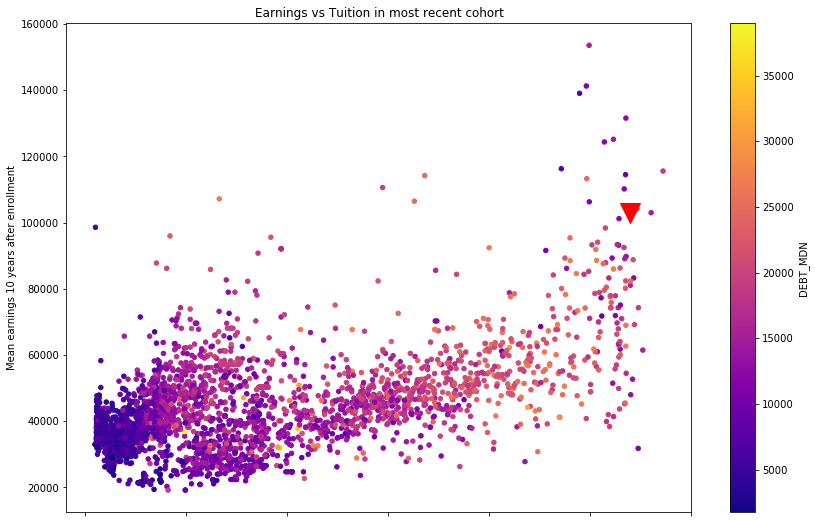

In [21]:
# let's mix in the debt of these schools, and highlight CMU
ax = sub_data.plot.scatter(x='TUITIONFEE_IN', y='MN_EARN_WNE_P10', c='DEBT_MDN', cmap='plasma', figsize=(14,9),)
ax.scatter(sub_data[cmu_mask].TUITIONFEE_IN, sub_data[cmu_mask].MN_EARN_WNE_P10, s=400, c='r', marker='v')
ax.set_title('Earnings vs Tuition in most recent cohort')
ax.set_ylabel('Mean earnings 10 years after enrollment')
ax.set_xlabel('Tuition cost');

Interesting. So it looks like CMU is at the high end of tuition fees and also earnings.

To wrap up our exploration, let's peek at accessibility for low-income students.

A major indicator of how many low-income students your university is supporting is the percentage of students with Pell grants, here represented by the `PCTPELL` variable. Let's plot that vs earnings and see if there is any correlation.

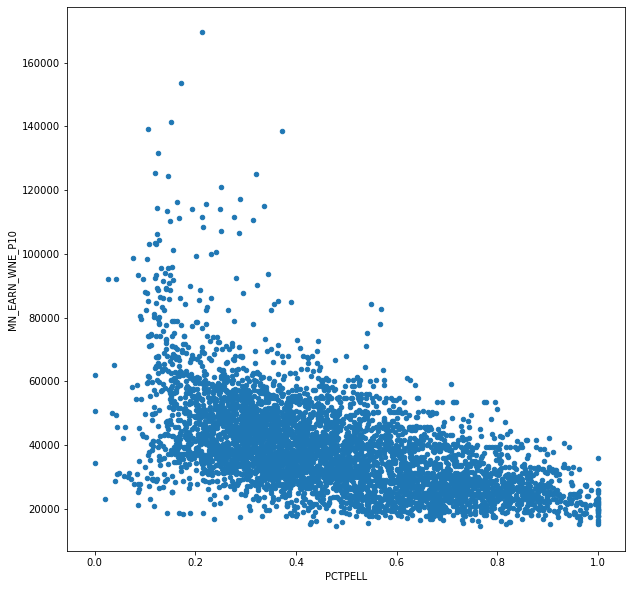

In [22]:
# Is there a pattern between Percentage of Pell grant students and mean earnings?
sub_data.plot.scatter(x='PCTPELL', y='MN_EARN_WNE_P10', figsize=(10,10))

There appears to be a slight downward slope, with the highest earners consistently coming from schools with fewer Pell grant recipients.

# Approach and sub-questions
At this point, we have determined that there are interesting trends to investigate in the data, even involving the most basic or obvious variables. The hardest problem really is determining _which_ of those trends will help us answer our primary question: **Is college (specifically CMU) worth the expense?**

We determined that the best way to approach this problem is through the standard collegiate journey that most students make, which includes (broadly) 4 basic parts:
1. Admissions
2. Tuition
3. Debt
4. Earnings

All of this data is available in the College Scorecard dataset. Additionally, this data is available over a long period of time, so we can see how this journey has changed in the last 20 years, especially for CMU students.

# Data loading #
We want all data (just the columns we care about) loaded together so that we can look at change over time... Let's do it.
We'll combine the data into a single Pandas dataframe and then write it out to a fresh CSV so we can reuse it here and in Tableau.

In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [24]:
cols_of_interest = ['UNITID',
                    'INSTNM',
                    'ADM_RATE',
                    'TUITIONFEE_IN',    # instate tuition
                    'TUITIONFEE_OUT',   # out of state tuition
                    'C150_4',    # completion rate within 150% of expected time
                    'MN_EARN_WNE_P6', 
                    'MD_EARN_WNE_P6', 
                    'MN_EARN_WNE_P10', 
                    'MD_EARN_WNE_P10', 
                    'PCTPELL',      # percent of students receiving pell grant (2008 on)
                    'RET_FT4',    # percent of students enrolled 1 yr after starting
                    'UGDS',    # not available in 2000-2001 file
                    'TUITFTE',    # net tuition revenue per student
                    'INEXPFTE',   # instructional expenditure per student
                    'AVGFACSAL',  # avg faculty salary per month
                    'PCTFLOAN',   # pct of students receiving federal loans
                    'CDR2',       # 2-yr default rate (2012 and prior)
                    'CDR3',       # 3-yr default rate (2012 on)
                    'DEBT_MDN',   # median loan debt accumulated
                    'PELL_DEBT_MDN',
                    'NOPELL_DEBT_MDN',
                    'PELL_EVER',  # students who received pell grant ever
                    'LOAN_EVER',  # students who received loan ever
                    'FAMINC',     # avg family income in 2015 dollars (earnings cohort)
                    'MD_FAMINC',  # median family income (earnings cohort)
                    'DEBT_MDN_SUPP',  # median debt suppressed for n < 30
                    'GRAD_DEBT_MDN_SUPP', # same, but for completers
                    'CONTROL', # 1: Public, 2: Private nonprof, 3: Priv for-prof
                    ]

# now set up the data types of these columns -- all but the name will be floats
col_types = {a: np.dtype('float64') for a in cols_of_interest[2:]}

In [25]:
# now test on one file
data = pd.read_csv('data/time_series_raw/MERGED2008_09_PP.csv', na_values='PrivacySuppressed', 
                   usecols=cols_of_interest, dtype=col_types)
data.head()

,UNITID,INSTNM,CONTROL,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,...,LOAN_EVER,PELL_EVER,FAMINC,MD_FAMINC,MN_EARN_WNE_P10,MD_EARN_WNE_P10,MN_EARN_WNE_P6,MD_EARN_WNE_P6,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP
0,100654,Alabama A & M University,1.0,0.4900,4290.0,4072.0,7304.0,5447.0,5544.0,6421.0,...,0.927180,0.819644,34968.108383,25066.0,NaN,NaN,NaN,NaN,7860.5,19126.0
1,100663,University of Alabama at Birmingham,1.0,0.8510,9989.0,4664.0,10352.0,5229.0,16379.0,8666.0,...,0.918703,0.588581,48381.730028,35025.0,NaN,NaN,NaN,NaN,7500.0,13000.0
2,100690,Amridge University,2.0,NaN,356.0,6600.0,6600.0,10284.0,5019.0,3326.0,...,0.944615,0.720000,31490.172308,24658.0,NaN,NaN,NaN,NaN,7500.0,14090.0
3,100706,University of Alabama in Huntsville,1.0,0.8917,5689.0,5952.0,13092.0,5494.0,7500.0,7812.0,...,0.919624,0.640445,49859.403164,35982.0,NaN,NaN,NaN,NaN,7500.0,14500.0
4,100724,Alabama State University,1.0,0.4228,4730.0,5460.0,10068.0,5461.0,5899.0,6367.0,...,0.944316,0.873840,27650.760441,20631.5,NaN,NaN,NaN,NaN,6731.5,21942.0


In [26]:
# get info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6975 entries, 0 to 6974
Data columns (total 29 columns):
UNITID                6975 non-null int64
INSTNM                6975 non-null object
CONTROL               6952 non-null float64
ADM_RATE              2793 non-null float64
UGDS                  6476 non-null float64
TUITIONFEE_IN         4186 non-null float64
TUITIONFEE_OUT        4056 non-null float64
TUITFTE               6659 non-null float64
INEXPFTE              6659 non-null float64
AVGFACSAL             4309 non-null float64
PCTPELL               6421 non-null float64
C150_4                2222 non-null float64
RET_FT4               2310 non-null float64
PCTFLOAN              0 non-null float64
CDR2                  6555 non-null float64
CDR3                  0 non-null float64
DEBT_MDN              5814 non-null float64
PELL_DEBT_MDN         5199 non-null float64
NOPELL_DEBT_MDN       5199 non-null float64
LOAN_EVER             5267 non-null float64
PELL_EVER             

In [27]:
# also want the year in here as a column... 
# we'll use the second of the two for any school year
data['Year'] = pd.Period('2009', freq='Y')
data.head(1)

,UNITID,INSTNM,CONTROL,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,...,PELL_EVER,FAMINC,MD_FAMINC,MN_EARN_WNE_P10,MD_EARN_WNE_P10,MN_EARN_WNE_P6,MD_EARN_WNE_P6,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,Year
0,100654,Alabama A & M University,1.0,0.49,4290.0,4072.0,7304.0,5447.0,5544.0,6421.0,...,0.819644,34968.108383,25066.0,NaN,NaN,NaN,NaN,7860.5,19126.0,2009


Now let's wrap it all up into a reusable function!

In [28]:
def read_college_files(year, cols, col_types):
  '''
  This function reads a single csv file from the College Scorecard dataset,
  adds a 'Year' column, and returns the data as a Dataframe.

  Assumes the files are in a directory called 'data'.
  '''
  second_year_abbrev = str(year+1)[2:]
  fname = f"data/time_series_raw/MERGED{year}_{second_year_abbrev}_PP.csv"
  frame = pd.read_csv(fname, na_values=['PrivacySuppressed','PrivacySuppr'], 
                   usecols=cols, dtype=col_types)
  frame['Year'] = pd.Period(str(year+1), freq='Y')

  return frame

In [0]:
# let's test it on all the files, concatenating so we can have tidy time-series data
data = pd.concat(read_college_files(year, cols_of_interest, col_types) for year in range(1996,2018))
data.head()

,UNITID,INSTNM,CONTROL,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,PCTPELL,C150_4,RET_FT4,PCTFLOAN,CDR2,CDR3,DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,LOAN_EVER,PELL_EVER,FAMINC,MD_FAMINC,MN_EARN_WNE_P10,MD_EARN_WNE_P10,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,Year
0,100636,Community College of the Air Force,1,NaN,44141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
1,100654,Alabama A & M University,1,NaN,3852.0,NaN,NaN,NaN,NaN,4285.0,NaN,NaN,NaN,NaN,0.171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
2,100663,University of Alabama at Birmingham,1,NaN,9889.0,NaN,NaN,NaN,NaN,5988.0,NaN,NaN,NaN,NaN,0.077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,1,NaN,295.0,NaN,NaN,NaN,NaN,4406.0,NaN,NaN,NaN,NaN,0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997
4,100690,Amridge University,2,NaN,60.0,NaN,NaN,NaN,NaN,2962.0,NaN,NaN,NaN,NaN,0.032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77970 entries, 0 to 7111
Data columns (total 28 columns):
UNITID                77970 non-null int64
INSTNM                77970 non-null object
CONTROL               77970 non-null int64
ADM_RATE              19379 non-null float64
UGDS                  69465 non-null float64
TUITIONFEE_IN         35692 non-null float64
TUITIONFEE_OUT        35246 non-null float64
TUITFTE               62693 non-null float64
INEXPFTE              62694 non-null float64
AVGFACSAL             49477 non-null float64
PCTPELL               25697 non-null float64
C150_4                25085 non-null float64
RET_FT4               14464 non-null float64
PCTFLOAN              23422 non-null float64
CDR2                  56280 non-null float64
CDR3                  20390 non-null float64
DEBT_MDN              52391 non-null float64
PELL_DEBT_MDN         46479 non-null float64
NOPELL_DEBT_MDN       46479 non-null float64
LOAN_EVER             46981 non-null float

In [0]:
# we want Year at the front (after UNITID) so let's reindex
new_col_names = cols_of_interest[:1] + ['Year'] + cols_of_interest[1:]
data = data.reindex(columns=new_col_names)
data.head(0)

,UNITID,Year,INSTNM,ADM_RATE,TUITIONFEE_IN,TUITIONFEE_OUT,C150_4,MN_EARN_WNE_P10,MD_EARN_WNE_P10,PCTPELL,RET_FT4,UGDS,TUITFTE,INEXPFTE,AVGFACSAL,PCTFLOAN,CDR2,CDR3,DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,PELL_EVER,LOAN_EVER,FAMINC,MD_FAMINC,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,CONTROL


In [0]:
# this cell just writes out the data we've selected and cleaned to a single csv
data.to_csv("time_series_cleaned_data.csv", index=False)

# Time series analysis
Now let's investigate how costs have changed over time, starting with CMU. Some of this analysis was done in Tableau, so we'll also be including images from there.

## 0. Data prep
First we load the freshly cleaned data and make sure that all is in order. Then we'll start the analysis.

In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from IPython.display import Image # allows us to include Tableau images

In [40]:
# set up a font dictionary for nice graphs
font = {'size'   : 18}
plt.style.use('seaborn')  # also a nice style

In [31]:
df = pd.read_csv('data/time_series_cleaned_data.csv', parse_dates=['Year'],)
df.head()

,UNITID,INSTNM,CONTROL,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,...,MD_FAMINC,MN_EARN_WNE_P6,MD_EARN_WNE_P6,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,Year
0,100636,Community College of the Air Force,1.0,NaN,44141.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
1,100654,Alabama A & M University,1.0,NaN,3852.0,NaN,NaN,NaN,NaN,4285.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
2,100663,University of Alabama at Birmingham,1.0,NaN,9889.0,NaN,NaN,NaN,NaN,5988.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,1.0,NaN,295.0,NaN,NaN,NaN,NaN,4406.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
4,100690,Amridge University,2.0,NaN,60.0,NaN,NaN,NaN,NaN,2962.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154282 entries, 0 to 154281
Data columns (total 32 columns):
UNITID                154282 non-null int64
INSTNM                154282 non-null object
CONTROL               154259 non-null float64
ADM_RATE              42583 non-null float64
UGDS                  137004 non-null float64
TUITIONFEE_IN         74888 non-null float64
TUITIONFEE_OUT        72845 non-null float64
TUITFTE               133831 non-null float64
INEXPFTE              133826 non-null float64
AVGFACSAL             88334 non-null float64
PCTPELL               67435 non-null float64
C150_4                44620 non-null float64
RET_FT4               31776 non-null float64
PCTFLOAN              61013 non-null float64
CDR2                  111601 non-null float64
CDR3                  47845 non-null float64
DEBT_MDN              115148 non-null float64
PELL_DEBT_MDN         100211 non-null float64
NOPELL_DEBT_MDN       100211 non-null float64
LOAN_EVER             10397

We're looking for general trends in schools, so let's filter those that are too small.

In [35]:
MIN_SIZE = (df['UGDS'] > 5000)  # this mask value can be changed if needed
big_schools = df[MIN_SIZE]
big_schools.head()

,UNITID,INSTNM,CONTROL,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,...,MD_FAMINC,MN_EARN_WNE_P6,MD_EARN_WNE_P6,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,Year
0,100636,Community College of the Air Force,1.0,NaN,44141.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
2,100663,University of Alabama at Birmingham,1.0,NaN,9889.0,NaN,NaN,NaN,NaN,5988.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
7,100751,The University of Alabama,1.0,NaN,13948.0,NaN,NaN,NaN,NaN,5595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
11,100858,Auburn University,1.0,NaN,18337.0,NaN,NaN,NaN,NaN,5519.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
28,101240,Gadsden State Community College,1.0,NaN,5125.0,NaN,NaN,NaN,NaN,4362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01


In [36]:
# let's try selecting just CMU, to make sure it's here!
mask = (df['INSTNM'].str.contains('Carnegie Mellon'))
df[mask].head()

,UNITID,INSTNM,CONTROL,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,...,MD_FAMINC,MN_EARN_WNE_P6,MD_EARN_WNE_P6,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,Year
4085,211440,Carnegie Mellon University,2.0,NaN,4814.0,NaN,NaN,NaN,NaN,8452.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-01
10698,211440,Carnegie Mellon University,2.0,NaN,4831.0,NaN,NaN,NaN,NaN,8790.0,...,55590.0,NaN,NaN,NaN,NaN,NaN,NaN,15505.0,NaN,1998-01-01
17278,211440,Carnegie Mellon University,2.0,NaN,5039.0,NaN,NaN,14268.0,18703.0,9063.0,...,59628.0,NaN,NaN,NaN,NaN,NaN,NaN,15125.0,NaN,1999-01-01
23718,211440,Carnegie Mellon University,2.0,NaN,5138.0,NaN,NaN,14249.0,18257.0,9366.0,...,61562.0,NaN,NaN,NaN,NaN,NaN,NaN,15062.0,NaN,2000-01-01
30116,211440,Carnegie Mellon University,2.0,NaN,NaN,24792.0,24792.0,15385.0,19744.0,NaN,...,62038.5,NaN,NaN,NaN,NaN,NaN,NaN,14803.0,NaN,2001-01-01


In [37]:
# this will be useful for later analyses
cmu = df[mask].copy()
cmu.set_index('Year', inplace=True)
cmu.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 1997-01-01 to 2018-01-01
Data columns (total 31 columns):
UNITID                22 non-null int64
INSTNM                22 non-null object
CONTROL               22 non-null float64
ADM_RATE              17 non-null float64
UGDS                  21 non-null float64
TUITIONFEE_IN         18 non-null float64
TUITIONFEE_OUT        18 non-null float64
TUITFTE               20 non-null float64
INEXPFTE              20 non-null float64
AVGFACSAL             21 non-null float64
PCTPELL               10 non-null float64
C150_4                21 non-null float64
RET_FT4               14 non-null float64
PCTFLOAN              9 non-null float64
CDR2                  17 non-null float64
CDR3                  7 non-null float64
DEBT_MDN              20 non-null float64
PELL_DEBT_MDN         20 non-null float64
NOPELL_DEBT_MDN       20 non-null float64
LOAN_EVER             20 non-null float64
PELL_EVER             20 non-null float64


## 1. Admissions
First we examine the selectivity of colleges, and how that relates to earnings outcomes and tuition costs.

In [38]:
# for reproducibility
np.random.seed(1)

# this is a very large data set, so let's sample some of them for plotting
gr = big_schools.groupby(by='UNITID')

# now create sample group of proper size
a = np.arange(gr.ngroups)   # get num groups (institution)
np.random.shuffle(a)        # randomize selection
selection = a[:500]         # just get some of them


# apply the filter to get new groupby - include CMU!
big_schools_sample = pd.concat([big_schools[gr.ngroup().isin(selection)], gr.get_group(211440)])
gr = big_schools_sample.groupby(by='UNITID')

# some schools are missing most of their data, so let's filter
data_filter = gr.count()['ADM_RATE'] >= 13

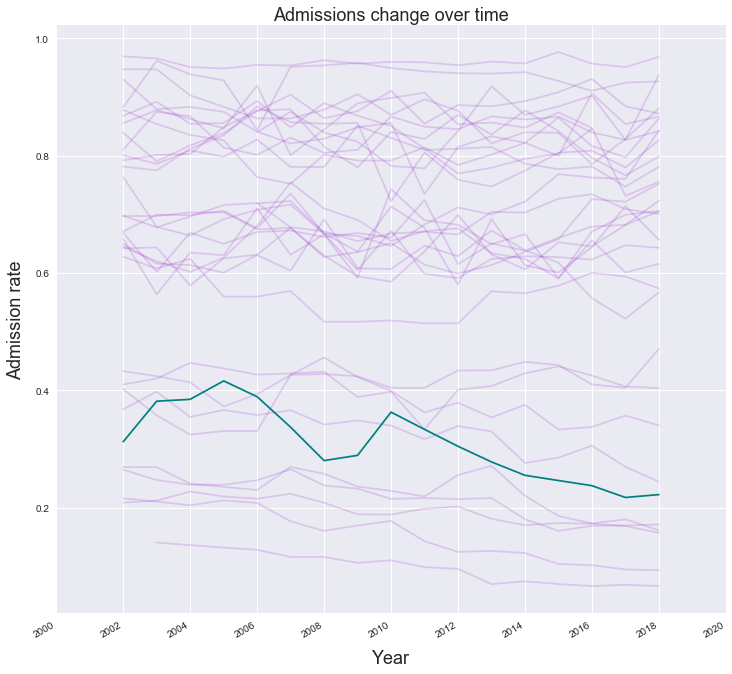

In [43]:
# now for the tricky part
ax = plt.axes()

# plot each group if it falls in our sample selection or if it's CMU
for key, gp in gr:
  gp = gp.reset_index()
  if key==211440:   # this is CMU's id
    gp.plot(x='Year', y='ADM_RATE', c='teal', ax=ax, legend=False, figsize=(12,12))
  elif data_filter[key] and gp.ADM_RATE.std() < 0.05:   # ensure enough data and that it isn't crazy
    gp.plot(x='Year', y='ADM_RATE', alpha=0.2, c='darkorchid', ax=ax, legend=False, figsize=(12,12))

# make it look nice
ax.set_xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2020-01-01'))
ax.set_title('Admissions change over time', fontdict=font, pad=5)
ax.set_ylabel('Admission rate', fontdict=font, labelpad=10)
ax.set_xlabel('Year', fontdict=font, labelpad=10)
plt.show()

Looks like CMU has always been quite selective, although not quite as much as many schools. Let's get more details from Tableau.

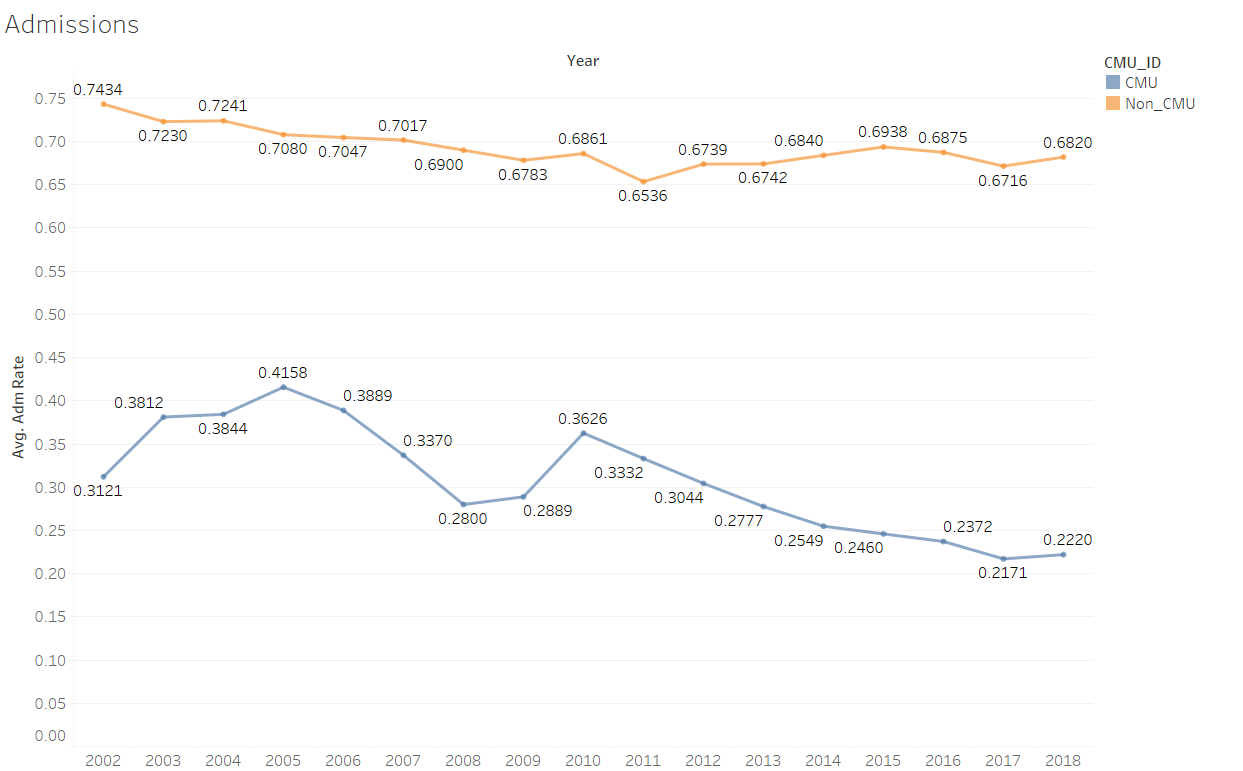

In [44]:
Image('img/adm_cmu.png')

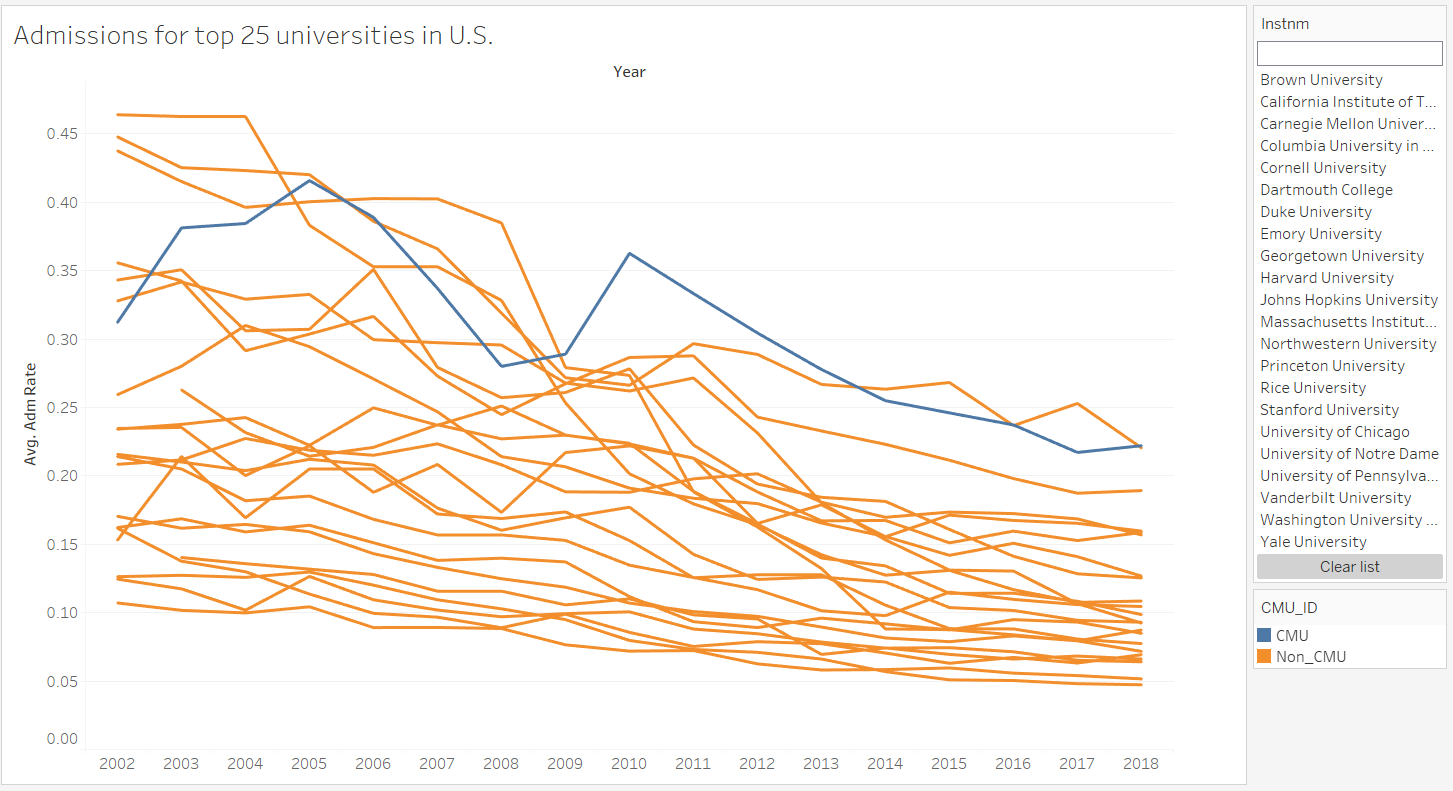

In [47]:
Image('img/adm_top_25.png')

### Insight
* CMU is clearly much more selective than the average school. 
* However CMU also manages to admit a higher percentage of students than many other elite schools.
* Also, we can see that those same top schools have become generally _more_ selective over time.

---
Now let's compare these admissions rates with earnings to see if they correspond.

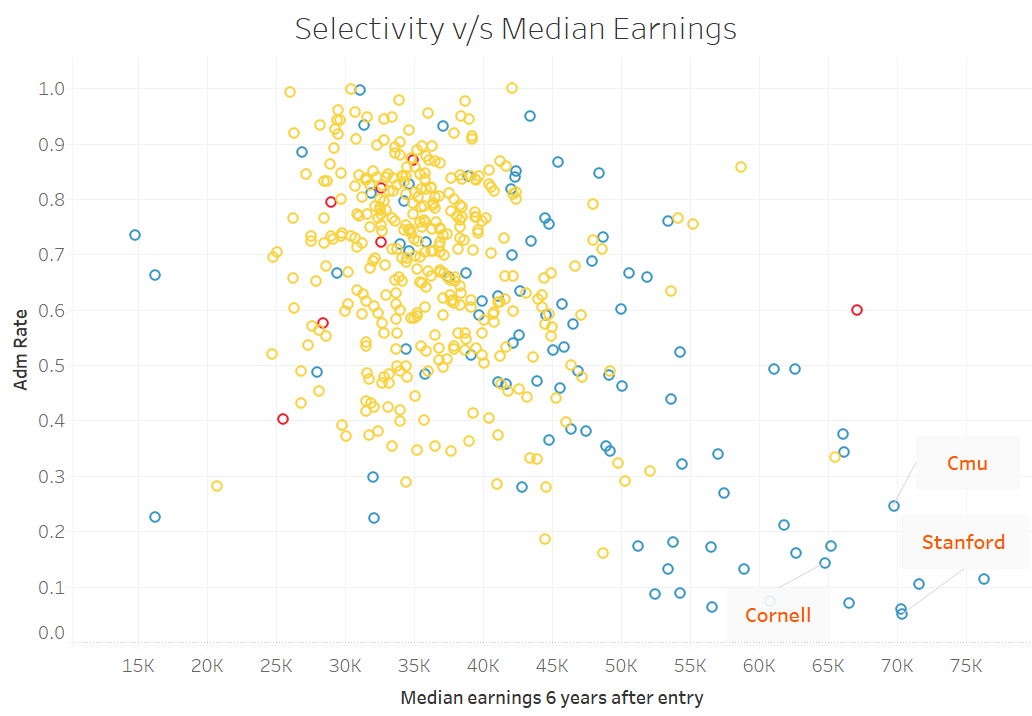

In [49]:
Image('img/adm_earnings_annot.png')

### Insight
The trend is again clear!
* Higher-earning colleges are more selective. 
* This turns out to be good news for students at schools like CMU and other top colleges. 

## 2. Tuition
The second stage is tuition, which we expect to have a correlation with earnings outcomes as well. Let's start by looking at CMU's change in tuition over time.

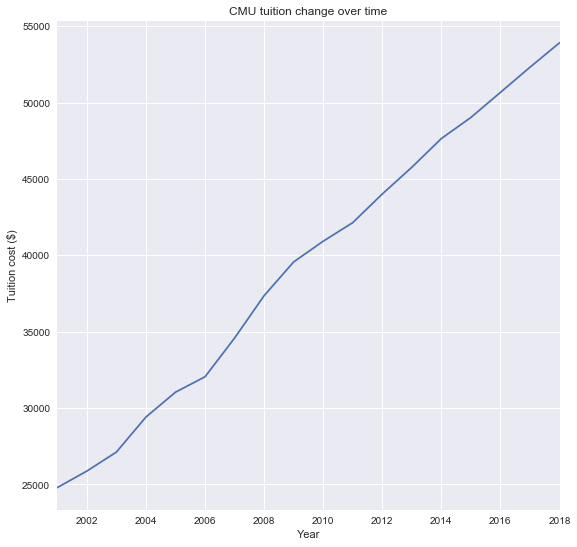

In [50]:
ax = cmu.plot(y='TUITIONFEE_IN', figsize=(9,9), legend=False)
ax.set(title='CMU tuition change over time', ylabel='Tuition cost ($)')
ax.set_xlim(pd.Timestamp('2001-01-01'))   # start where the data starts
plt.show()

Looks pretty consistent! What if we compared it with just an average 3% inflation every year?

In [51]:
inflation = np.ones(22) +0.03
inflation[:4] = np.nan
inflation[4] = 25000   # start with $25,000
inflation = np.nancumprod(inflation)
inflation

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       2.50000000e+04, 2.57500000e+04, 2.65225000e+04, 2.73181750e+04,
       2.81377202e+04, 2.89818519e+04, 2.98513074e+04, 3.07468466e+04,
       3.16692520e+04, 3.26193296e+04, 3.35979095e+04, 3.46058468e+04,
       3.56440222e+04, 3.67133428e+04, 3.78147431e+04, 3.89491854e+04,
       4.01176610e+04, 4.13211908e+04])

In [52]:
cmu['INFLATE'] = inflation
cmu.head()

,UNITID,INSTNM,CONTROL,ADM_RATE,UGDS,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,...,MD_FAMINC,MN_EARN_WNE_P6,MD_EARN_WNE_P6,PCT10_EARN_WNE_P6,PCT25_EARN_WNE_P6,PCT75_EARN_WNE_P6,PCT90_EARN_WNE_P6,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,INFLATE
Year,,,,,,,,,,,,,,,,,,,,,
1997-01-01,211440,Carnegie Mellon University,2.0,NaN,4814.0,NaN,NaN,NaN,NaN,8452.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1998-01-01,211440,Carnegie Mellon University,2.0,NaN,4831.0,NaN,NaN,NaN,NaN,8790.0,...,55590.0,NaN,NaN,NaN,NaN,NaN,NaN,15505.0,NaN,1.0
1999-01-01,211440,Carnegie Mellon University,2.0,NaN,5039.0,NaN,NaN,14268.0,18703.0,9063.0,...,59628.0,NaN,NaN,NaN,NaN,NaN,NaN,15125.0,NaN,1.0
2000-01-01,211440,Carnegie Mellon University,2.0,NaN,5138.0,NaN,NaN,14249.0,18257.0,9366.0,...,61562.0,NaN,NaN,NaN,NaN,NaN,NaN,15062.0,NaN,1.0
2001-01-01,211440,Carnegie Mellon University,2.0,NaN,NaN,24792.0,24792.0,15385.0,19744.0,NaN,...,62038.5,NaN,NaN,NaN,NaN,NaN,NaN,14803.0,NaN,25000.0


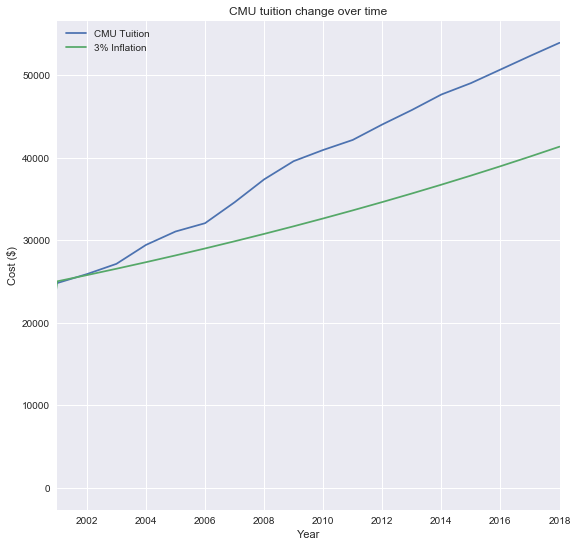

In [53]:
ax = cmu.plot(y=['TUITIONFEE_IN', 'INFLATE'], figsize=(9,9))
ax.set(title='CMU tuition change over time', ylabel='Cost ($)')
ax.set_xlim(pd.Timestamp('2001-01-01'))
ax.legend(['CMU Tuition', '3% Inflation'])
plt.show()

### CMU vs. other schools
Clearly tuition has gone up faster than plain old inflation.
How does this compare to other schools?

In [0]:
# for reproducibility
np.random.seed(95885)

# this is a very large data set, so let's sample some of them for plotting
gr = big_schools.groupby(by='UNITID')

# now create sample group of proper size
a = np.arange(gr.ngroups)   # get num groups (institution)
np.random.shuffle(a)        # randomize selection
selection = a[:500]         # just get some of them


# apply the filter to get new groupby - include CMU!
big_schools_sample = pd.concat([big_schools[gr.ngroup().isin(selection)], gr.get_group(211440)])
gr = big_schools_sample.groupby(by='UNITID')

# some schools are missing most of their data, so let's filter
data_filter = gr.count()['TUITIONFEE_IN'] > 15

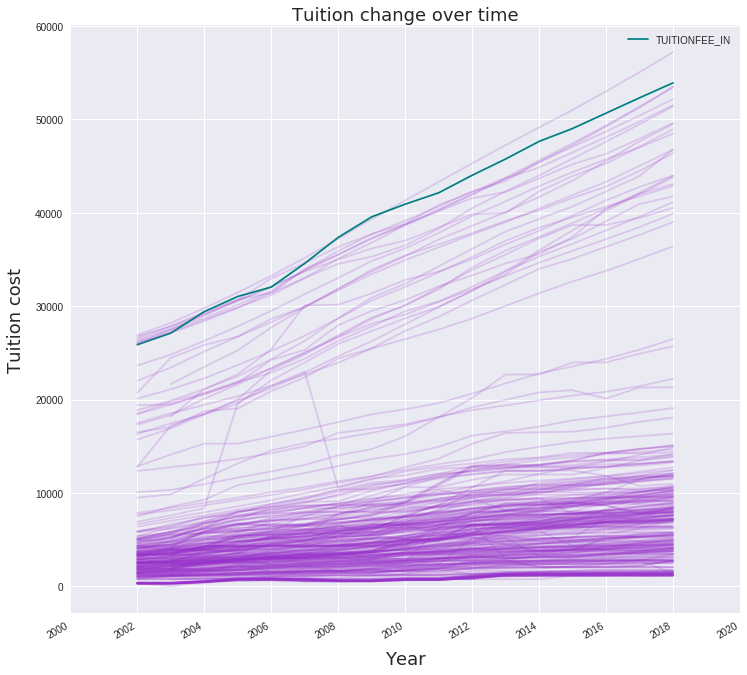

In [66]:
# now for the tricky part
ax = plt.axes()

# plot each group if it falls in our sample selection or if it's CMU
for key, gp in gr:
  gp = gp.reset_index()
  if key==211440:   # this is CMU's id
    gp.plot(x='Year', y='TUITIONFEE_IN', c='teal', ax=ax, legend=['CMU Tuition'], figsize=(12,12))
  elif data_filter[key]:
    gp.plot(x='Year', y='TUITIONFEE_IN', alpha=0.2, c='darkorchid', ax=ax, legend=False, figsize=(12,12))

ax.set_xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2020-01-01'))
ax.set_title('Tuition change over time', fontdict=font, pad=5)
ax.set_ylabel('Tuition cost', fontdict=font, labelpad=10)
ax.set_xlabel('Year', fontdict=font, labelpad=10)
plt.show()

Interesting! Let's use Tableau to get another angle on the data.

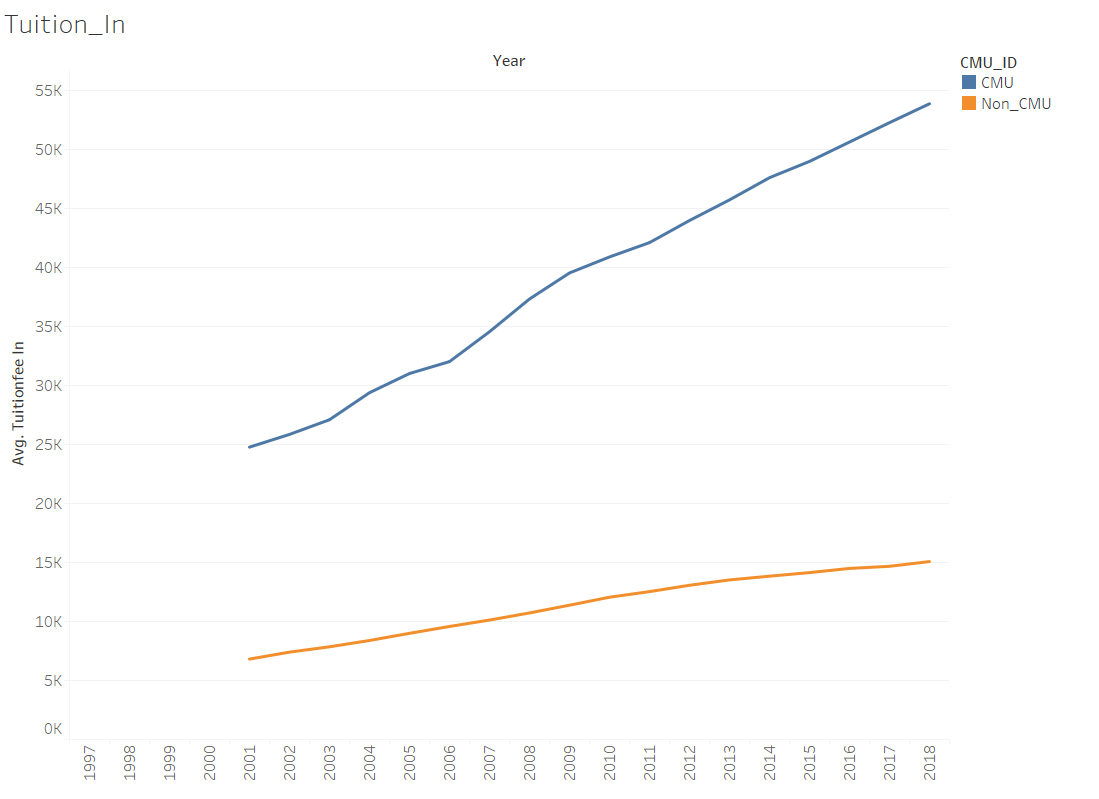

In [54]:
Image('img/tuition_cmu_average.png')

### Insight
* Looks like some schools have stayed extremely consistent while CMU and others have increased steadily.
* CMU has always been one of the more expensive schools to attend, during this time span at least.

---
We wondered at this point: 
1. Does this tuition correspond with changes in average family income over the years?
2. How are earnings associated with tuition?

Both answers were easy to find in Tableau.


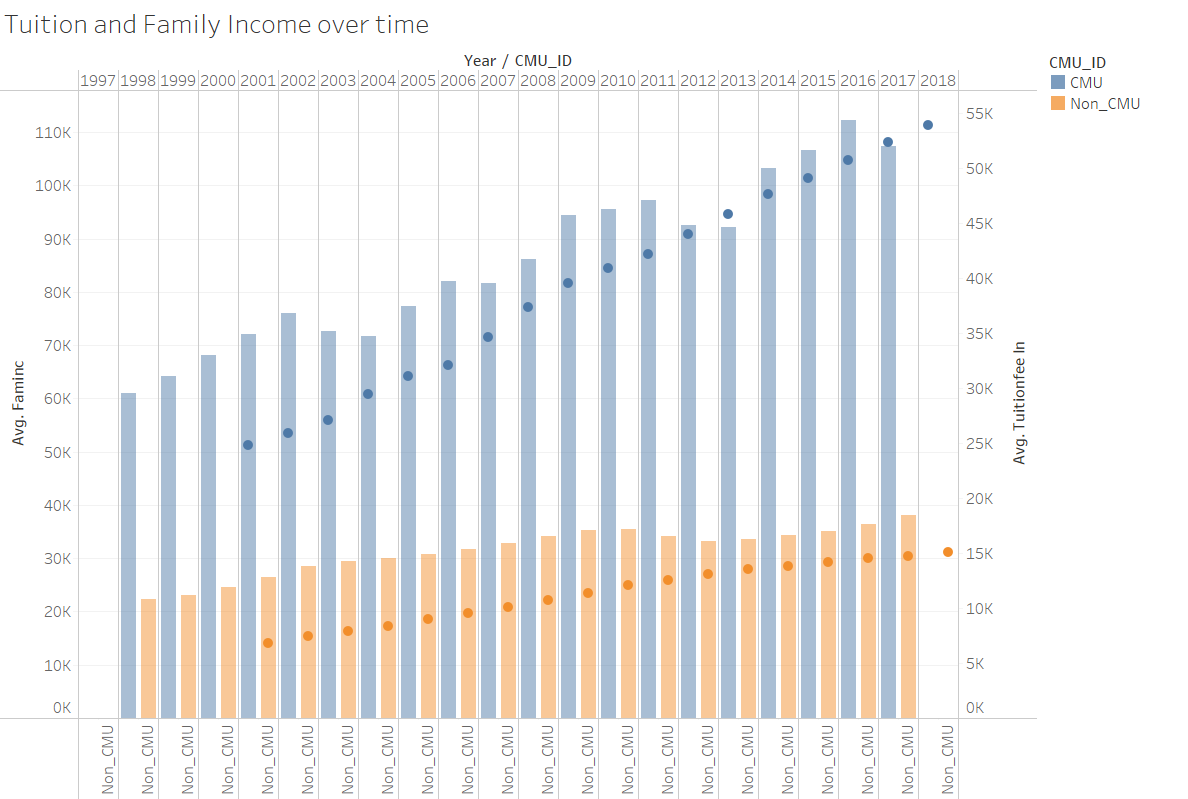

In [56]:
Image('img/tuition_faminc_time.png')

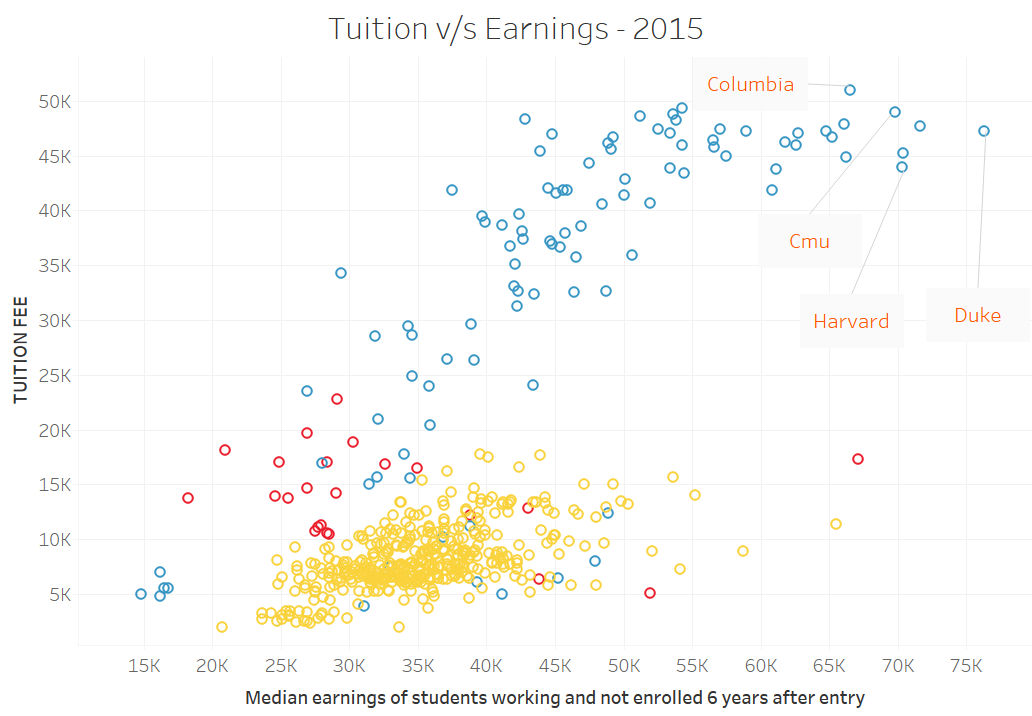

In [57]:
Image('img/tuition_earnings.png')

### Insight
* It's clear that the average family income at CMU has kept pace with increasing tuition fees; and
* changes on average haven't been as substantial elsewhere.
* Additionally, as we might have expected from our look at admissions, colleges with higher student earnings also tend to be more expensive. Why that is would be hard to pin down, since it is likely that many students who can afford more expensive schools are already better positioned for earnings after graduation for other reasons.

## 3. Debt
Now let's look into where all this money comes from. College Scorecard includes data about average/median debt levels, along with the percentage of students receiving federal loans at any given institution.

First we see how CMU fits into schools more generally.

In [0]:
# for reproducibility
np.random.seed(4)

# this is a very large data set, so let's sample some of them for plotting
gr = big_schools.groupby(by='UNITID')

# now create sample group of proper size
a = np.arange(gr.ngroups)   # get num groups (institution)
np.random.shuffle(a)        # randomize selection
selection = a[:500]         # just get some of them


# apply the filter to get new groupby - include CMU!
big_schools_sample = pd.concat([big_schools[gr.ngroup().isin(selection)], gr.get_group(211440)])
gr = big_schools_sample.groupby(by='UNITID')

# some schools are missing most of their data, so let's filter
data_filter = gr.count()['DEBT_MDN_SUPP'] >= 18

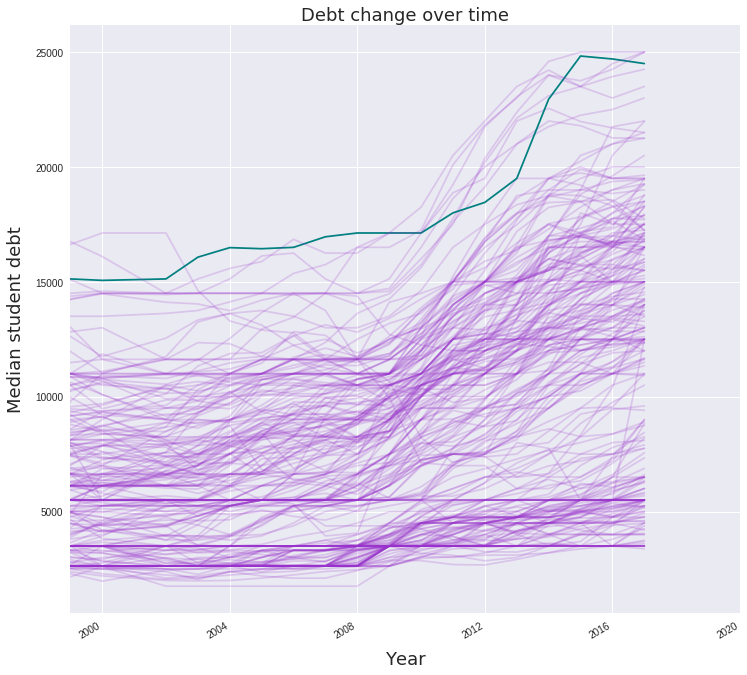

In [0]:
# now for the tricky part
ax = plt.axes()

# plot each group if it falls in our sample selection or if it's CMU
for key, gp in gr:
  gp = gp.reset_index()
  if key==211440:   # this is CMU's id
    gp.plot(x='Year', y='DEBT_MDN_SUPP', c='teal', ax=ax, legend=False, figsize=(12,12))
  elif data_filter[key]:   # ensure enough data
    gp.plot(x='Year', y='DEBT_MDN_SUPP', alpha=0.2, c='darkorchid', ax=ax, legend=False, figsize=(12,12))

ax.set_xlim(pd.Timestamp('1999-01-01'), pd.Timestamp('2020-01-01'))
ax.set_title('Debt change over time', fontdict=font, pad=5)
ax.set_ylabel('Median student debt', fontdict=font, labelpad=10)
ax.set_xlabel('Year', fontdict=font, labelpad=10)
plt.show()

Wow! Median debt has increased quite a bit over time, especially at CMU. Tableau tells the same story:

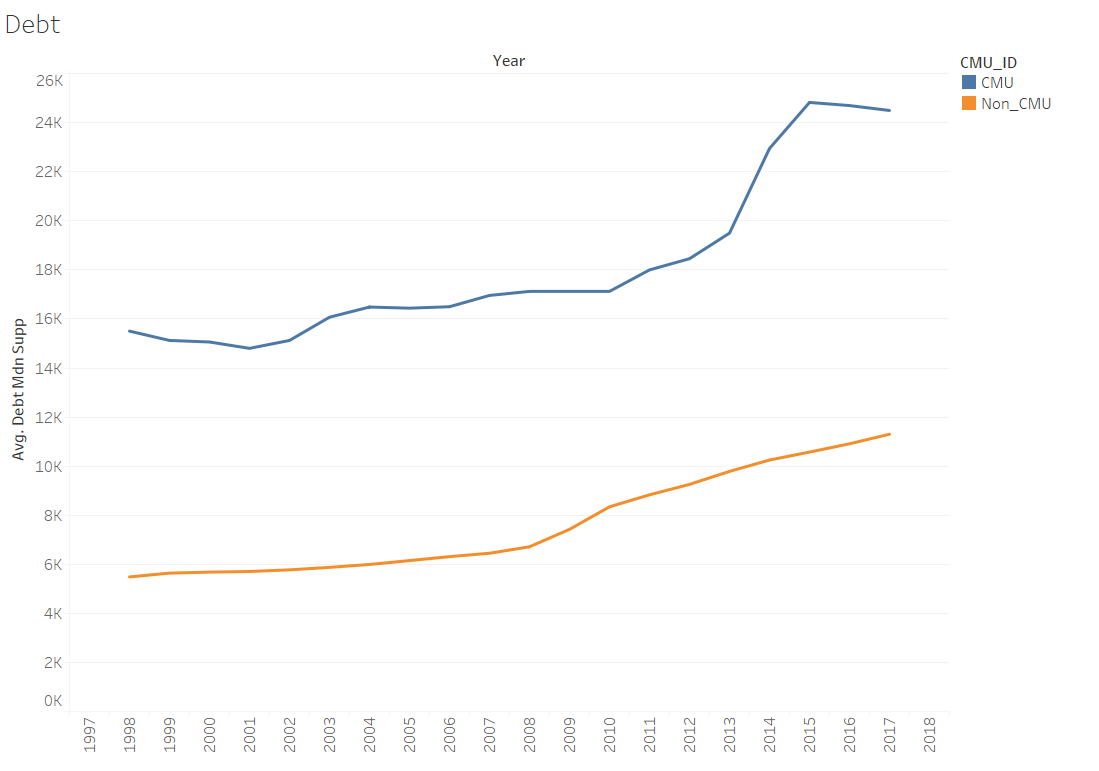

In [58]:
Image('img/debt_cmu_avg.png')

Median student debt has nearly doubled on average, with CMU's especially taking a strong turn for the worse around 2013.
What effect did this have on loan default rates?

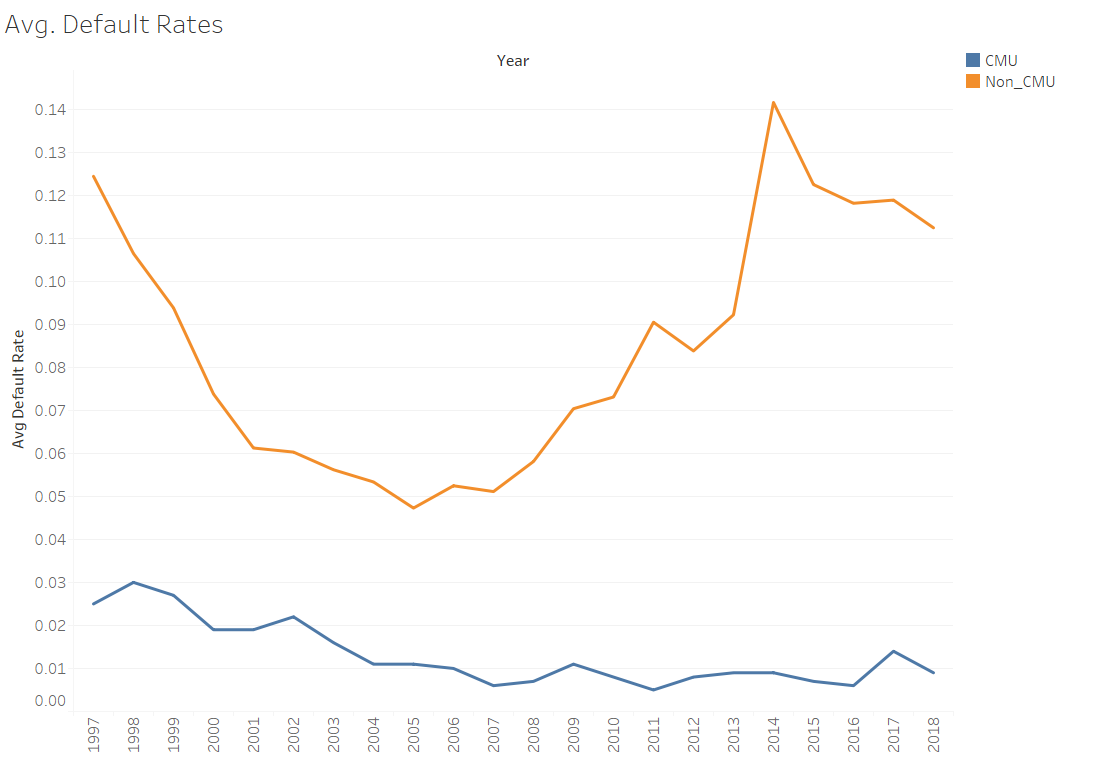

In [59]:
Image('img/default_cmu_avg.png')

### Insight
* Median student debt has risen steadily since 2008, with a spike in default rates in the years after the Great Recession (2010 and following).
* In spite of CMU student debt rising faster than average, loan default rates appear to be unaffected. This suggests that CMU graduate earnings (along with other factors) are sufficiently promising to enable those students to pay off their debt, even in times of general economic stress.

---
What do borrowing rates look like for CMU and other top institutions?

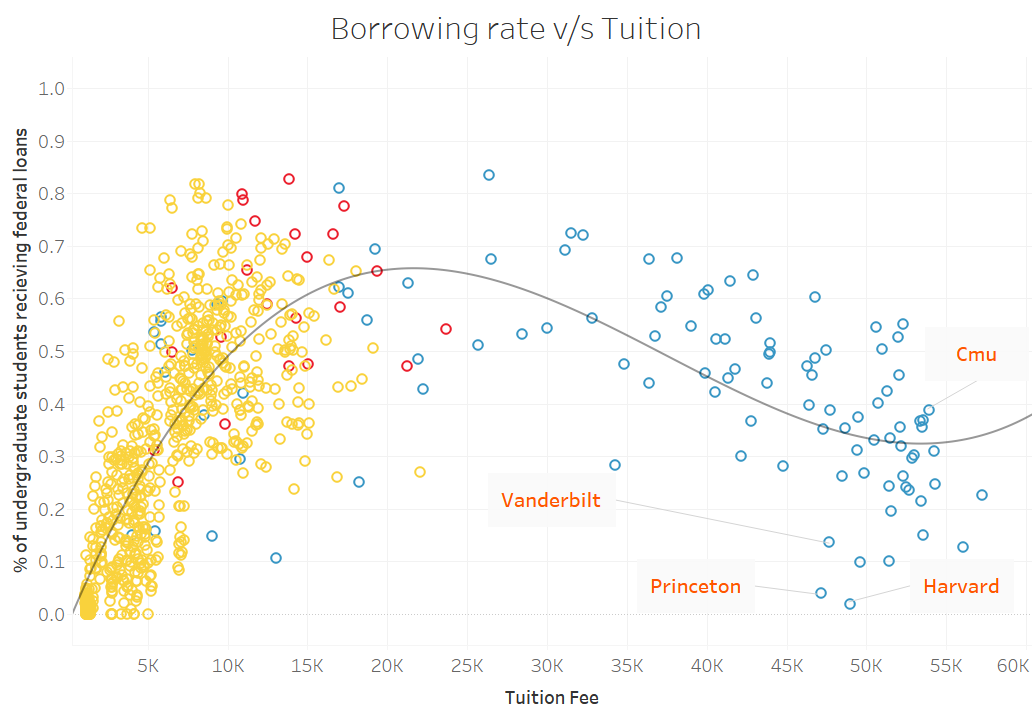

In [60]:
Image('img/borrowing rate.png')

Many top schools have far fewer students receiving loans than CMU, in spite of being comparably priced! Why would this be? We hypothesized that perhaps those schools had high family income levels, which might explain why so many students were able to go without a loan.

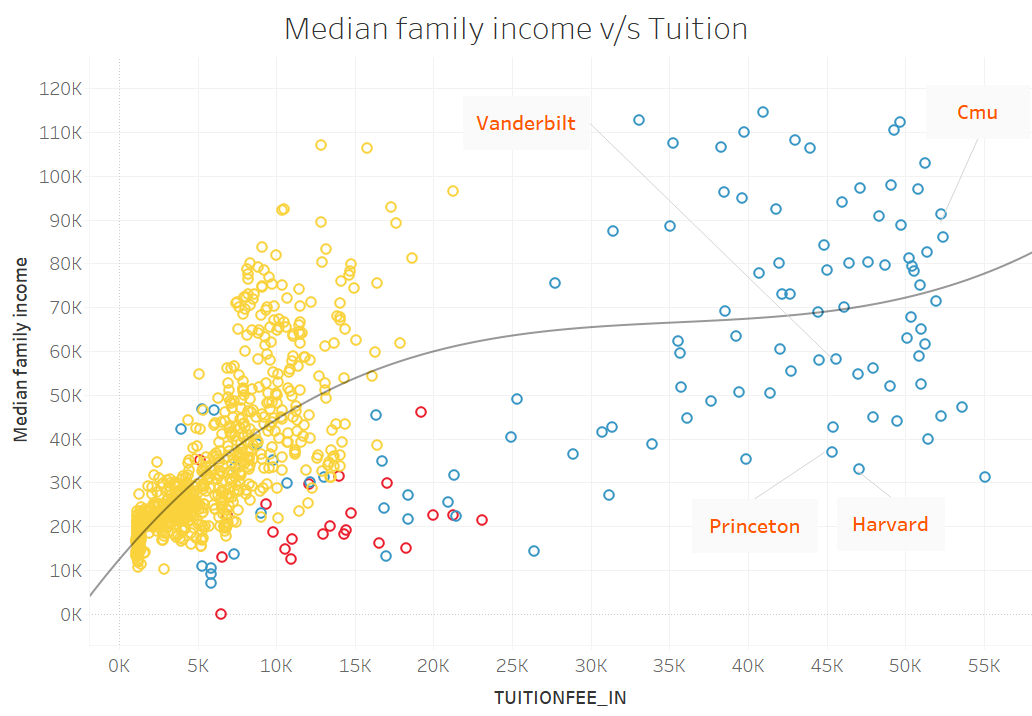

In [61]:
Image('img/tuition_faminc.png')

Incredibly, these other elite schools also manage to be accessible to low median income students. In fact, CMU's median family income is nearly triple that of Harvard!

---
At this point we had to search outside the data to find out what was happening. We discovered that many top schools have joined a group known as "No-Loan Colleges", which are seeking to combat rising student debt in the U.S. These schools break the norm:
* Financial aid doesn't include federal loans by default, as with most schools.
* Instead, students who are identified as having need of a loan will receive additional **grant**-based aid to make up the difference.

More information can be found at: https://www.thebalance.com/what-are-no-loan-colleges-4588079

### Insight
* CMU _may_ not be as accessible to low-income families as other top colleges due to the high tuition and debt required to attend.

## 4. Earnings
Finally we summarize what we've been glimpsing all along: earnings outcomes for CMU graduates. Since we have already examined earnings with relation to the other main variables, let's just summarize the change in earnings over time for CMU vs other schools.

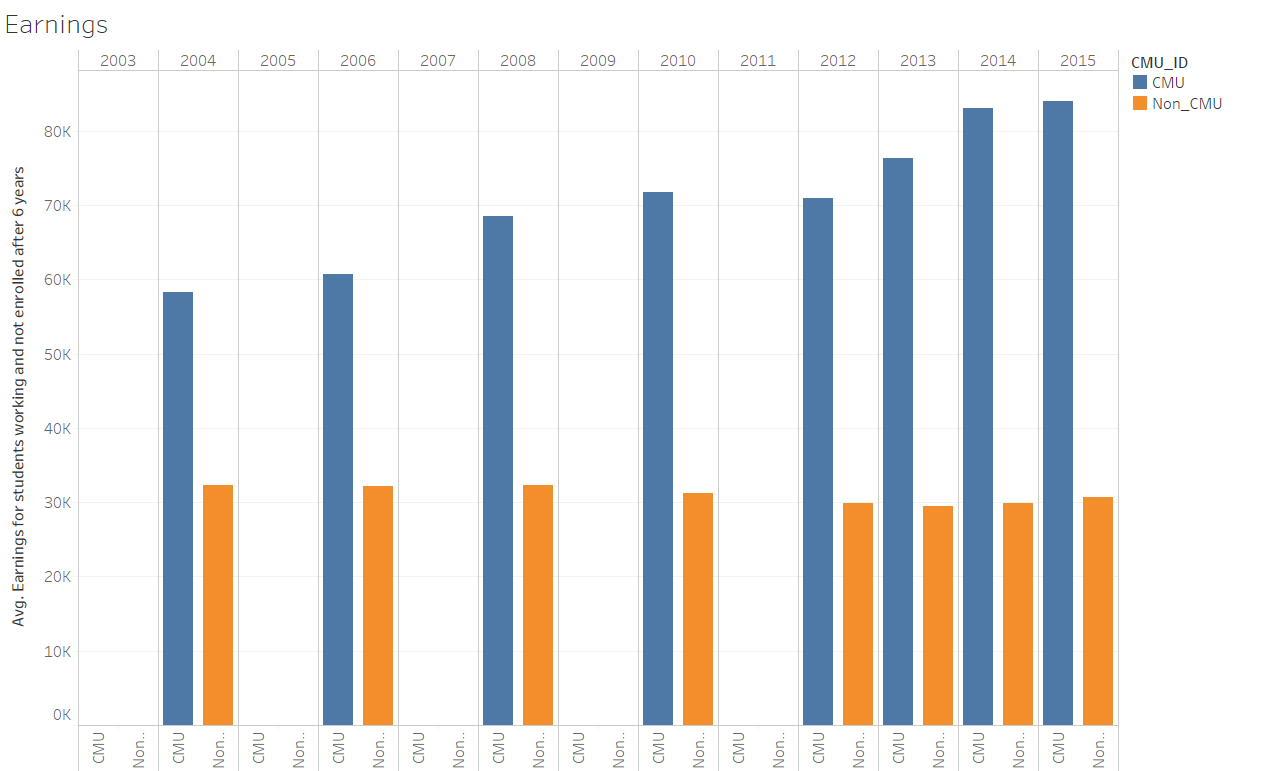

In [62]:
Image('img/earnings_cmu_avg.png')

### Insight
* Clearly CMU has had much stronger earnings outcomes than average for the last twenty years.
* All signs seem to indicate that CMU graduate earnings will continue to increase appreciably in the future.

# Findings
Our original question was: **Will we get a return on our investment for coming to CMU?**

The answer seems clear.
* Compared to the majority of other institutions, CMU rewards its graduates with high earnings potential--high enough to compensate for the exceptional levels of tuition and debt that accompany a CMU education. 
* Because of this CMU students very rarely default on their loans and should have little reason to worry (on average!).
* CMU also manages this kind of return while keeping quite high admissions levels compared to similarly performing schools.

---
There were some additional takeaways that we didn't expect to find in our search of institutions, primarily regarding access to low-income students.
* Compared to other elite schools, CMU tends to attract students with higher family incomes, perhaps because of the large amount of tuition and loan debt these students are sure to be saddled with.
* Compared to other elite schools, CMU appears to be lagging in two areas:
    1. Providing financial aid to students generally
    2. Being accessible to low-income students and populations

---
This analysis should be useful to anyone interested in attending CMU, their parents, administrators, and anyone concerned with the quality and value of CMU's education. In particular, we hope it will respond to the concerns of our primary audience: _current or former students who have wondered if their sacrifice was worth it_. We hope we have reassured you that, in fact, **it was**.

# Appendix
A bit of analysis that is potentially interesting, but didn't really fit into our narrative, is here.

In [0]:
cmu2 = cmu.reset_index()
cmu2.count()

Year                  20
UNITID                20
INSTNM                20
ADM_RATE              15
TUITIONFEE_IN         16
TUITIONFEE_OUT        16
C150_4                19
MN_EARN_WNE_P10        6
MD_EARN_WNE_P10        6
PCTPELL                8
RET_FT4               12
UGDS                  19
TUITFTE               18
INEXPFTE              18
AVGFACSAL             19
PCTFLOAN               7
CDR2                  17
CDR3                   5
DEBT_MDN              19
PELL_DEBT_MDN         19
NOPELL_DEBT_MDN       19
PELL_EVER             19
LOAN_EVER             19
FAMINC                19
MD_FAMINC             19
DEBT_MDN_SUPP         19
GRAD_DEBT_MDN_SUPP    14
CONTROL               20
dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


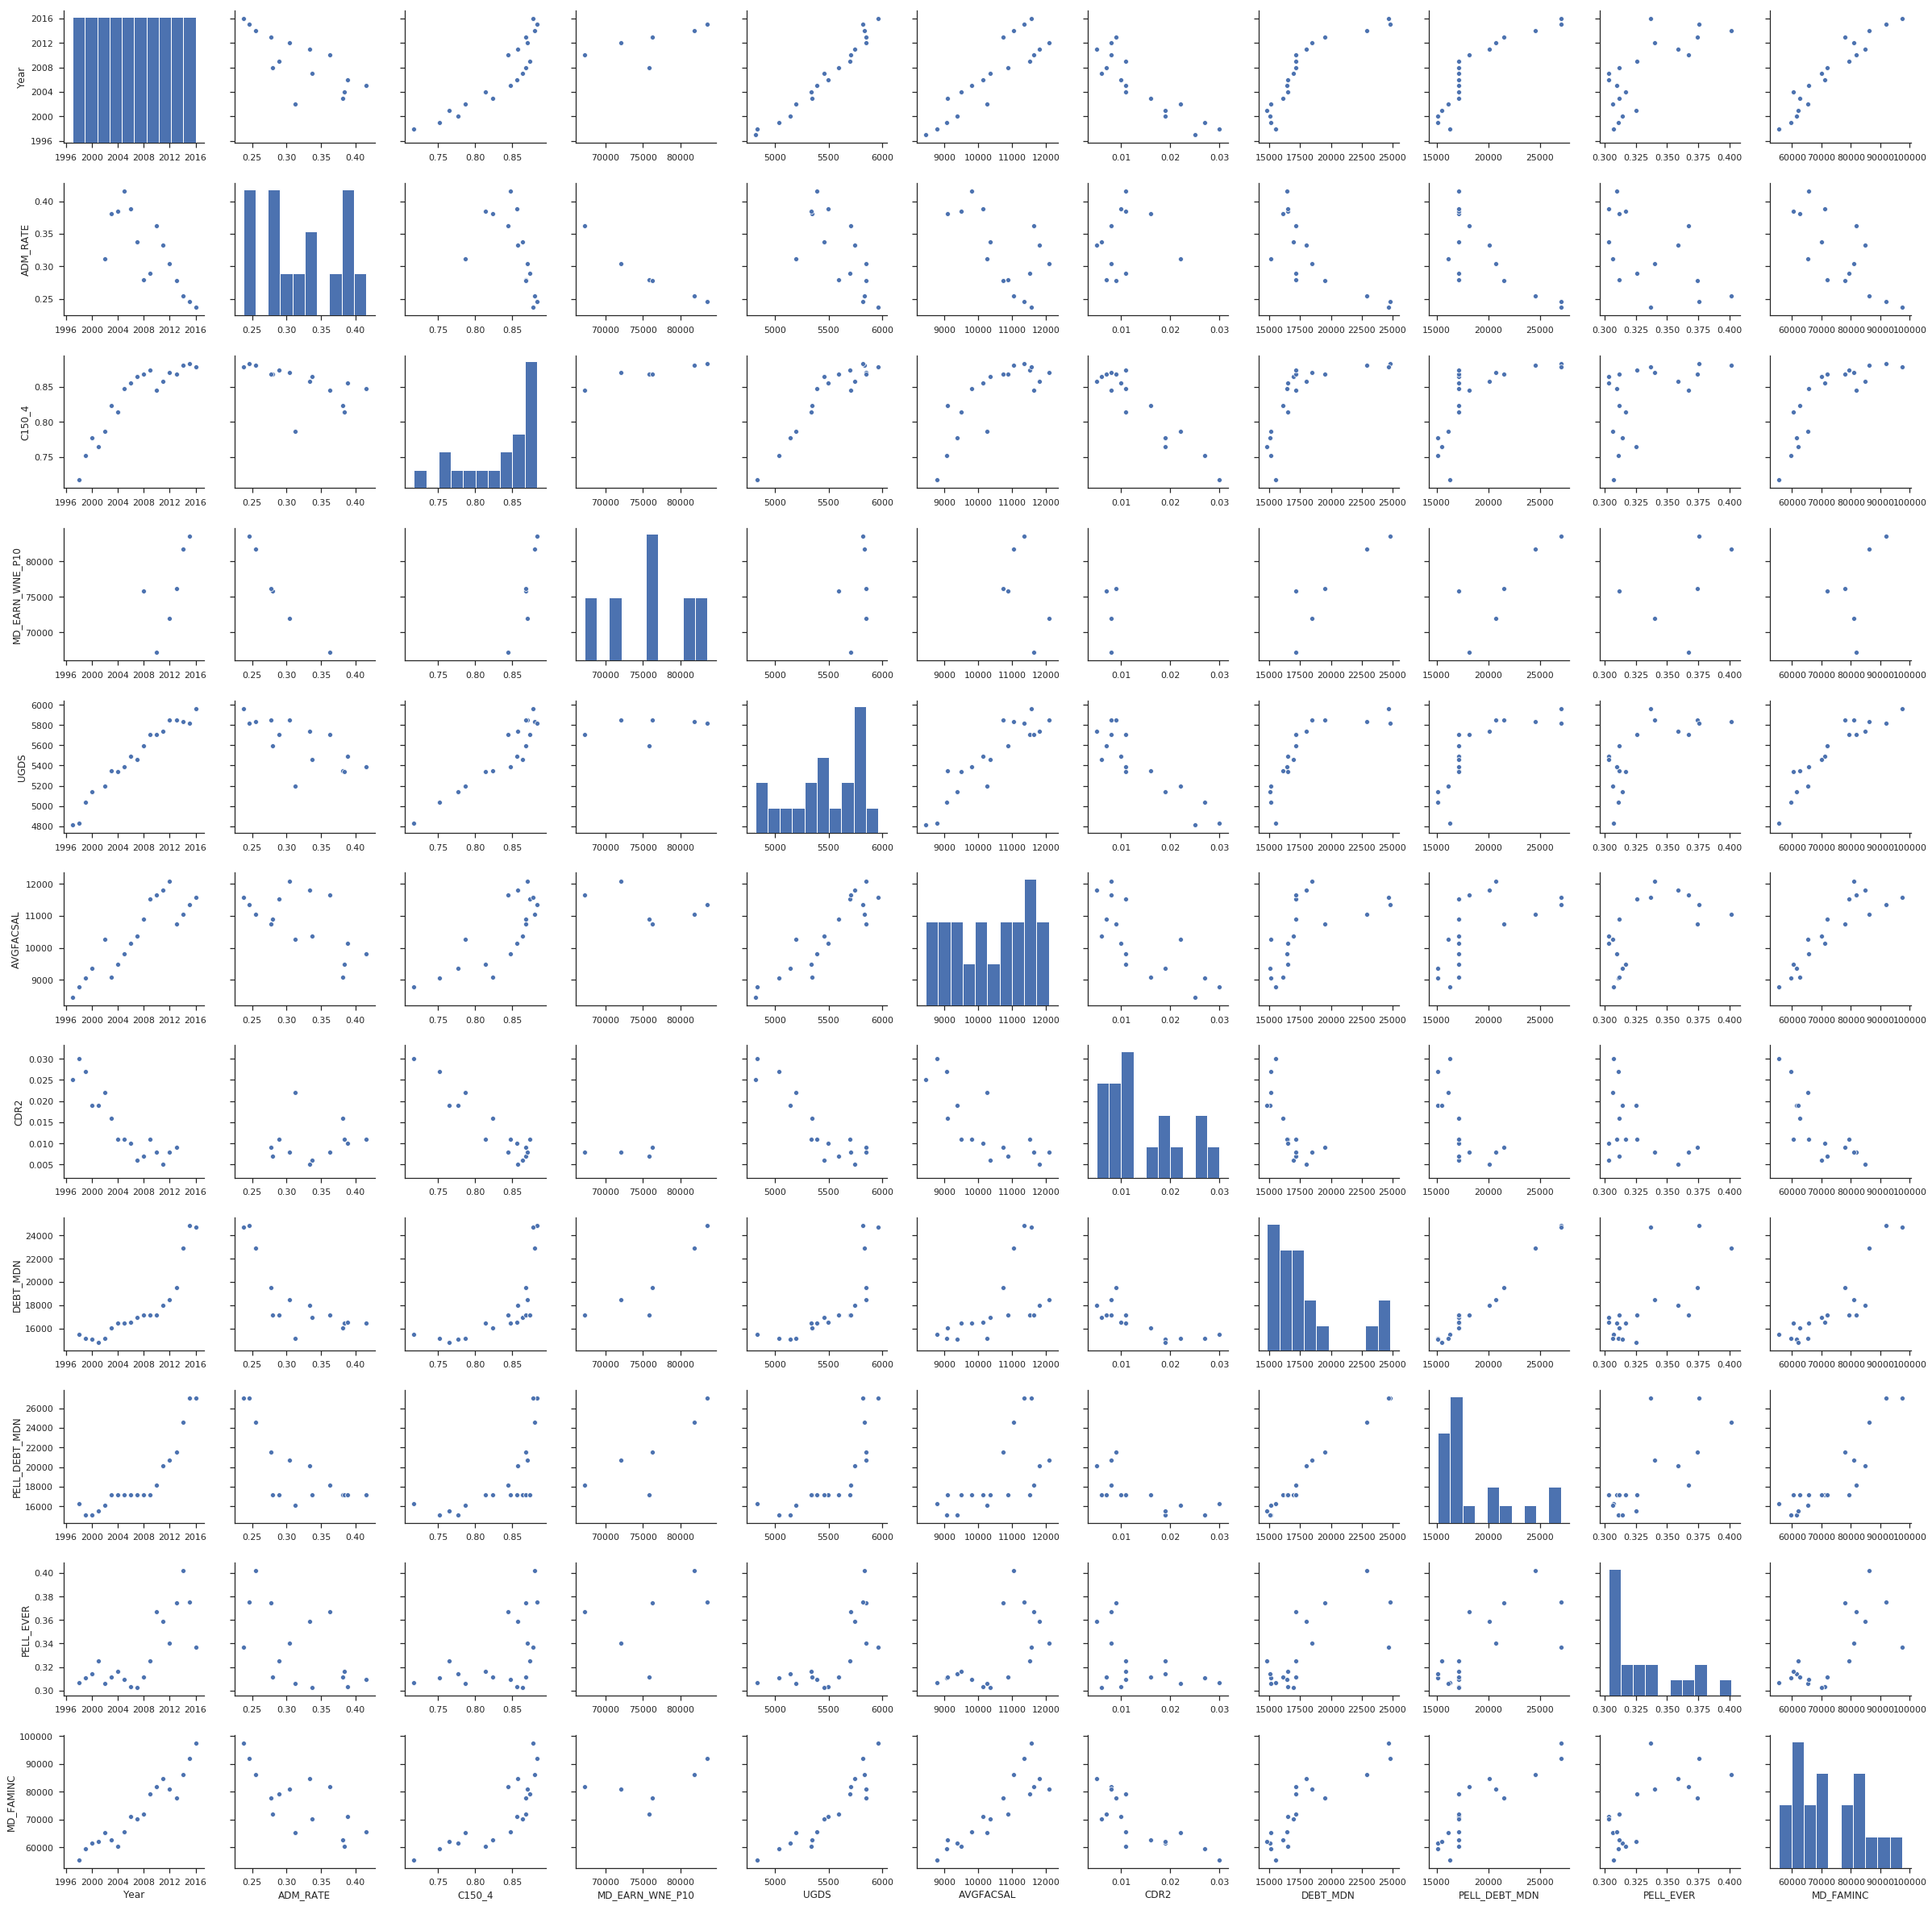

In [0]:
# pairplot lets us quickly look at many trends at once
pp = sns.pairplot(
    cmu2,
    vars=['Year',
          'ADM_RATE',
          'C150_4',
          'MD_EARN_WNE_P10',
          'UGDS',
          'AVGFACSAL',
          'CDR2',
          'DEBT_MDN',
          'PELL_DEBT_MDN',
          'PELL_EVER',
          'MD_FAMINC'],
    height=3)

for ax in pp.axes.flat:
  ax.tick_params(axis='x', labelbottom=True)

plt.subplots_adjust(hspace=0.3)

Well, even as tuition has gone up, it looks like so too have completion rates, debt, faculty salary, and earnings. At the same time default rates and admission rates have steadily decreased.